In [1]:
import numpy as np
import pandas as pd 
import sklearn 
import pickle
import matplotlib.pyplot as plt
import cv2

In [2]:
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
model_svm = pickle.load(open('./model/model_svm.pickle', mode='rb'))
pca_models = pickle.load(open('./model/pca_dict.pickle', mode='rb'))

In [4]:
models_pca = pca_models['pca']
mean_face_arr = pca_models['mean_face']

**Create Pipeline**

In [10]:
# step-01: read image
img = cv2.imread('test_data/chhichhore.jpg')
# step-02: convert into gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# step-03: crop the face (using haar cascade classifier)
faces = haar.detectMultiScale(gray,1.5,3)
predictions = []
for x,y,w,h in faces:
    roi = gray[y:y+h, x:x+w]
# step_04: normalization (0-1)
    roi = roi/255.0
# step_05: resize images (100,100)
    if roi.shape[1]>100:
        roi_resize=cv2.resize(roi,(100,100), cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi, (100,100), cv2.INTER_CUBIC)
# step_06: falttening (1x1000)
    roi_reshape = roi_resize.reshape(1,10000)
# step_07: subtract with mean
    roi_mean = roi_reshape - mean_face_arr
# step_08: get eigen image (apply roi mean to pca)
    eigen_image = models_pca.transform(roi_mean)
# step_09: Eigen Image for visualisation
    eig_img = models_pca.inverse_transform(eigen_image)
# step_10: pass to ml model (svm) and get predictions
    results = model_svm.predict(eigen_image)
    prob_score = model_svm.predict_proba(eigen_image)
    prob_score_max = prob_score.max()
    print(results, prob_score)
# step_11: generate report
    text = "%s : %d"%(results[0], prob_score_max*100)





    if results[0] == 'male':
        color = (255,0,255)
    else:
        color = (0, 255, 255)
    cv2.rectangle(img,(x,y), (x+w, y+h), color, 2)
    cv2.rectangle(img,(x,y-40), (x+w, y), color, -1)
    cv2.putText(img,text,(x,y), cv2.FONT_HERSHEY_PLAIN,1.7,(255,255,255),2)

    output = {
        'roi':roi,
        'eig_img': eig_img,
        'prediction_name':results[0],
        'score': prob_score_max
    }

    predictions.append(output)

['male'] [[0.0416501 0.9583499]]
['male'] [[0.38586683 0.61413317]]
['male'] [[0.39531074 0.60468926]]
['male'] [[0.10283163 0.89716837]]
['male'] [[0.33095524 0.66904476]]
['male'] [[0.0305421 0.9694579]]
['female'] [[0.57983741 0.42016259]]
['male'] [[0.22035714 0.77964286]]
['female'] [[0.95899364 0.04100636]]
['male'] [[0.25769348 0.74230652]]
['male'] [[0.47911058 0.52088942]]
['male'] [[0.21989755 0.78010245]]
['male'] [[0.3459523 0.6540477]]


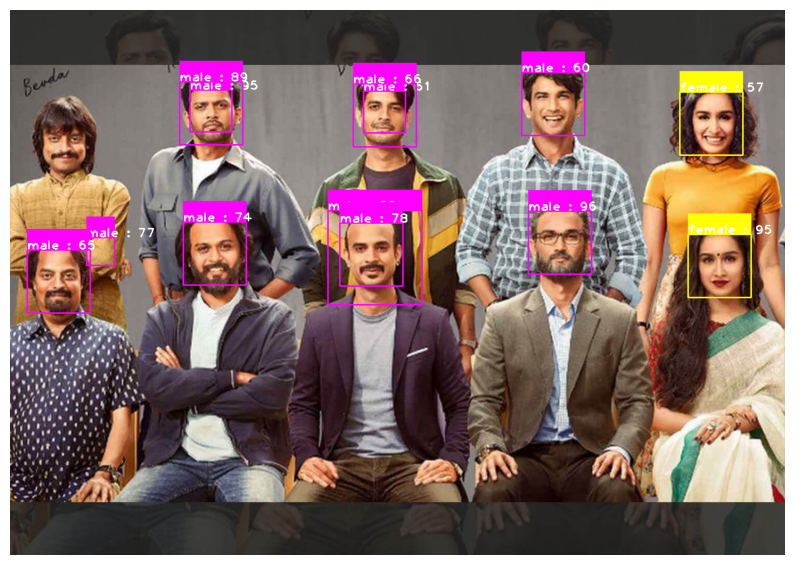

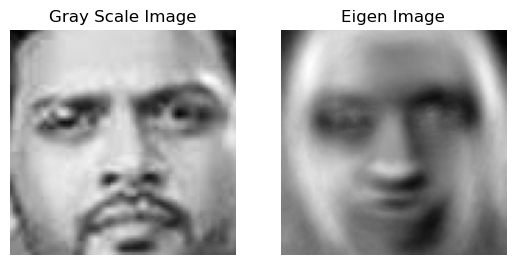

Predicted Gender = male
Predicted Score = 95.83 %
----------------------------------------------------------------------------------------------------


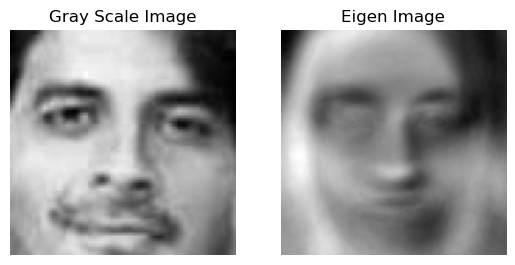

Predicted Gender = male
Predicted Score = 61.41 %
----------------------------------------------------------------------------------------------------


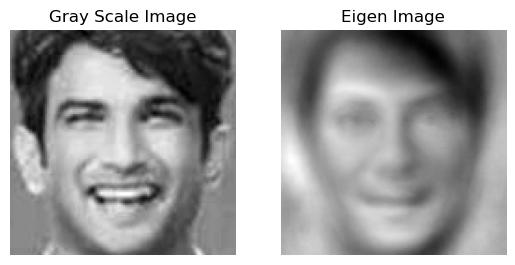

Predicted Gender = male
Predicted Score = 60.47 %
----------------------------------------------------------------------------------------------------


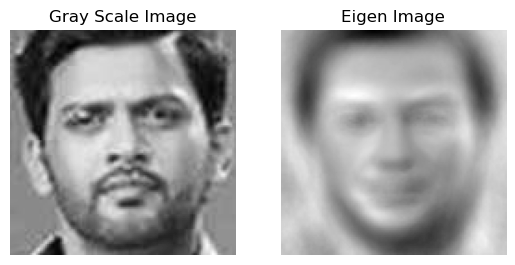

Predicted Gender = male
Predicted Score = 89.72 %
----------------------------------------------------------------------------------------------------


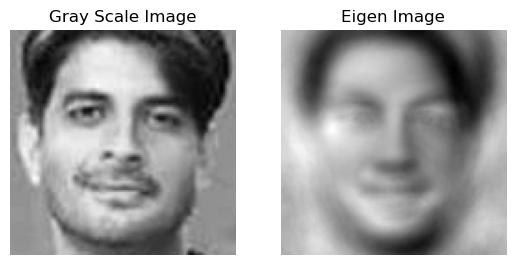

Predicted Gender = male
Predicted Score = 66.90 %
----------------------------------------------------------------------------------------------------


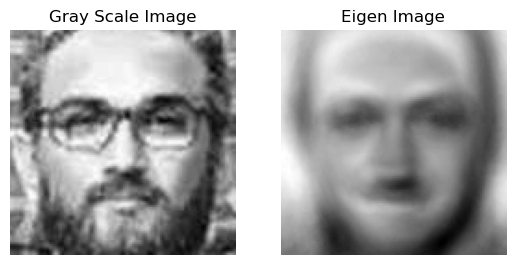

Predicted Gender = male
Predicted Score = 96.95 %
----------------------------------------------------------------------------------------------------


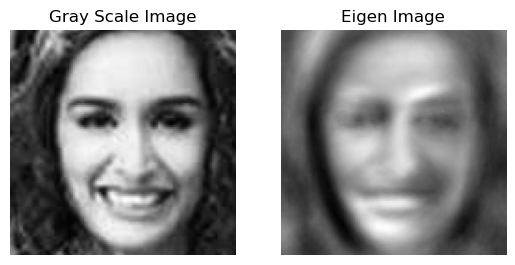

Predicted Gender = female
Predicted Score = 57.98 %
----------------------------------------------------------------------------------------------------


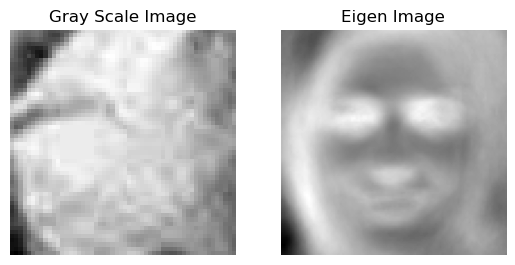

Predicted Gender = male
Predicted Score = 77.96 %
----------------------------------------------------------------------------------------------------


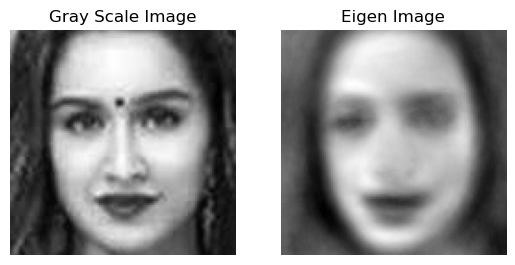

Predicted Gender = female
Predicted Score = 95.90 %
----------------------------------------------------------------------------------------------------


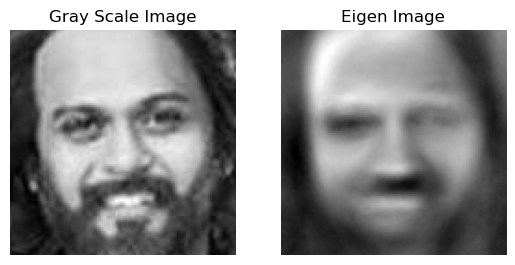

Predicted Gender = male
Predicted Score = 74.23 %
----------------------------------------------------------------------------------------------------


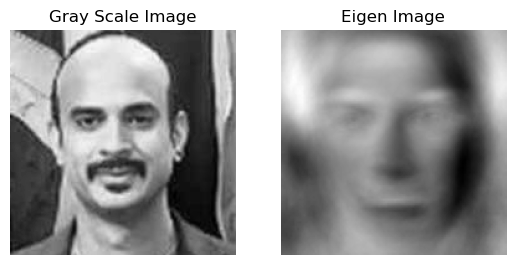

Predicted Gender = male
Predicted Score = 52.09 %
----------------------------------------------------------------------------------------------------


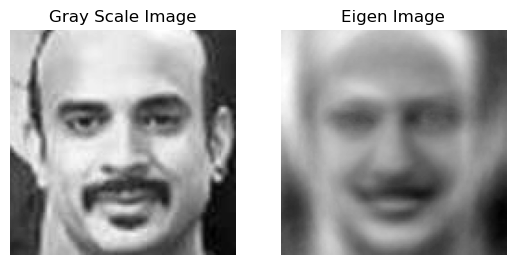

Predicted Gender = male
Predicted Score = 78.01 %
----------------------------------------------------------------------------------------------------


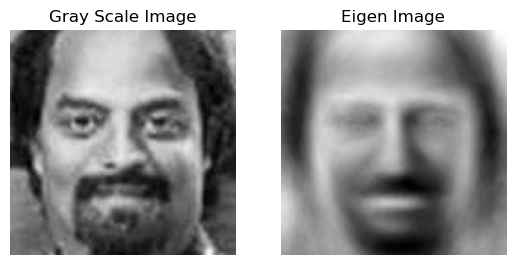

Predicted Gender = male
Predicted Score = 65.40 %
----------------------------------------------------------------------------------------------------


In [12]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

for i in range(len(predictions)):
    obj_gray = predictions[i]['roi']
    obj_eig = predictions[i]['eig_img'].reshape(100,100)
    plt.subplot(1,2,1)
    plt.imshow(obj_gray,cmap='gray')
    plt.title('Gray Scale Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig, cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')

    plt.show()
    print('Predicted Gender =', predictions[i]['prediction_name'])
    print('Predicted Score = {:,.2f} %'.format(predictions[i]['score']*100))

    print('-'*100)

In [12]:
cv2.imshow('oreo',img)
cv2.waitKey(0)
cv2.destroyAllWindows()